In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import numpy as np

plt.style.use("fivethirtyeight")
%matplotlib inline

In [4]:
from prompt_toolkit import HTML


def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    sns.set(font_scale=1.6)
    
    plt.style.use("fivethirtyeight")
    # sns.set(style='whitegrid')
    # plt.style.use('seaborn-darkgrid')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 16
    
    display( HTML('<style>.container {width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


HTML('<style>.container {width:100% !important; }</style>')

In [5]:
train = pd.read_csv('train.csv')
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
train.shape

(381109, 12)

C:\Users\86131\AppData\Local\Temp\ipykernel_9788\3050110839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Response", data = train, palette ="husl" ,edgecolor="black")


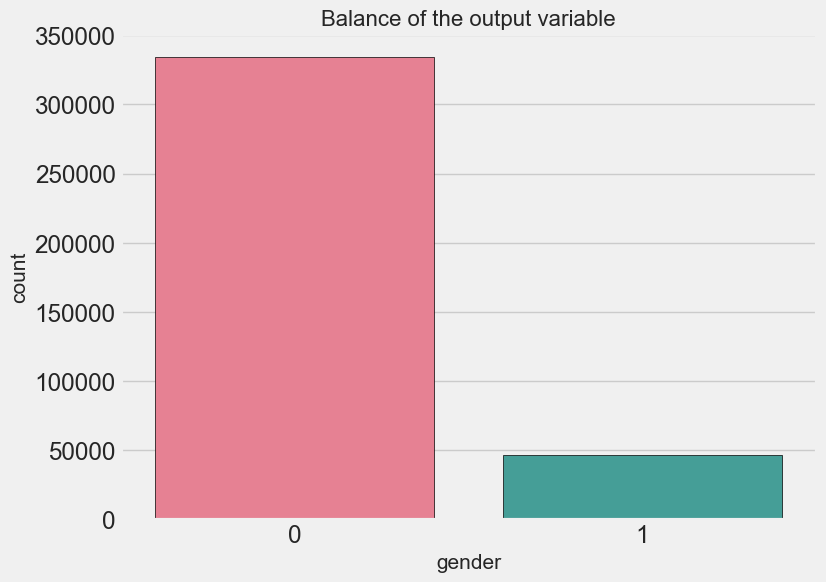

In [7]:
plt.figure(figsize=(8,6))

sns.countplot(x="Response", data = train, palette ="husl" ,edgecolor="black")
plt.ylabel('count', fontsize=15)
plt.xlabel('gender', fontsize=15)
plt.title('Balance of the output variable', fontsize=16)
plt.show()

In [8]:
train['age_range'] = train['Age'].apply(lambda x: 'Adult 1' if 20<x<30 else('Adult 2' if 30 < x < 40 else('Adult 3' if 40<x<65 else 'Elderly')))

In [9]:
train['monthly_premium'] = round(train['Annual_Premium']/12, 2)

In [10]:
train['percentage_total_premium'] = train['Annual_Premium']/train['Annual_Premium'].sum()

In [11]:
df = pd.get_dummies(train['Vehicle_Damage'], prefix='Vehicle_Damage').rename(columns={'vehicle_damage_0':'vehicle_damage_no', 'vehicle_damage_1':'vehicle_damage_yes'})

In [12]:
train  = pd.concat([train, df], axis=1)

In [13]:
train['insured_with_no_damage'] = train['Previously_Insured']*train['Vehicle_Damage_No']

In [14]:
train["not_insured_with_damage"] = train["Previously_Insured"].apply(lambda x: 1 if x == 0 else 0) * train["Vehicle_Damage_Yes"]

In [15]:
train["vehicle_age_<_1_year"] = train["Vehicle_Age"].apply(lambda x: 1 if x=='< 1 Year' else 0)

In [16]:
train["new_damage_no_insurance"] = train["vehicle_age_<_1_year"]*train["not_insured_with_damage"]

In [17]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,age_range,monthly_premium,percentage_total_premium,Vehicle_Damage_No,Vehicle_Damage_Yes,insured_with_no_damage,not_insured_with_damage,vehicle_age_<_1_year,new_damage_no_insurance
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Adult 3,3371.17,0.000003,False,True,0,1,0,0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Elderly,2794.67,0.000003,True,False,0,0,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Adult 3,3191.17,0.000003,False,True,0,1,0,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Adult 1,2384.92,0.000002,True,False,1,0,1,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Adult 1,2291.33,0.000002,True,False,1,0,1,0


In [18]:
categorical_features = train.select_dtypes(exclude=[np.number])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

In [21]:
train['Gender'] = le.fit_transform(train['Gender'])
train['Vehicle_Age'] = le.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = le.fit_transform(train['Vehicle_Damage'])
train['age_range'] = le.fit_transform(train['age_range'])

In [22]:
y = train['Response'].copy()
X = train.drop('Response', axis=1).copy()

In [24]:
from imblearn.over_sampling import ADASYN

In [25]:
adasyn = ADASYN()

In [26]:
X_adasyn, y_adasyn = adasyn.fit_resample(X,y)

In [27]:
print('The number of lines before oversampling : {}'.format(X.shape[0]))
print('The number of lines after oversampling : {}'.format(X_adasyn.shape[0]))

The number of lines before oversampling : 381109
The number of lines after oversampling : 673035


In [28]:
import matplotlib.pyplot as plt

Now the training data is shorter but the classes are balanced


C:\Users\86131\AppData\Local\Temp\ipykernel_9788\1334236425.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y_adasyn, palette ="husl", edgecolor="black")


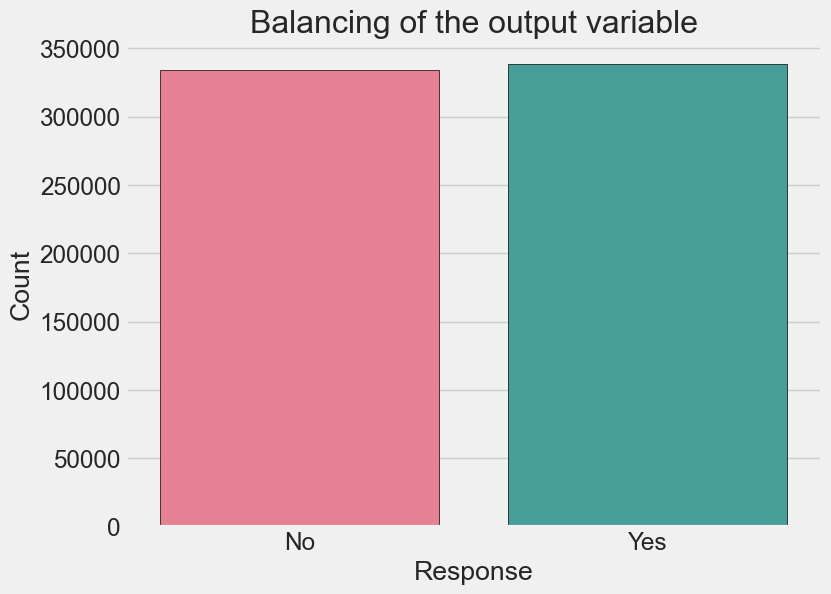

In [29]:
print("Now the training data is shorter but the classes are balanced")

# sets the plot size
plt.figure(figsize=(8,6))

# counts each class for the target var
ax = sns.countplot(x=y_adasyn, palette ="husl", edgecolor="black")

# sets plot features
plt.title("Balancing of the output variable")
plt.xlabel("Response")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No','Yes'])

# displays the plot
plt.show()

In [30]:
x_train, x_val, y_train, y_val = train_test_split(X_adasyn, y_adasyn, test_size=0.3, random_state=72)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf = RandomForestClassifier(random_state=1)

In [33]:
rf.fit(X_adasyn, y_adasyn)

RandomForestClassifier(random_state=1)

In [34]:
importances = rf.feature_importances_

In [35]:
importance = list(importances)

In [36]:
colum = list(X_adasyn.columns)

In [37]:
feature_importance = pd.DataFrame(zip(colum, importance), columns=['Feature', 'Importance']).sort_values('Importance')

In [38]:
feature_importance = feature_importance.set_index('Feature')

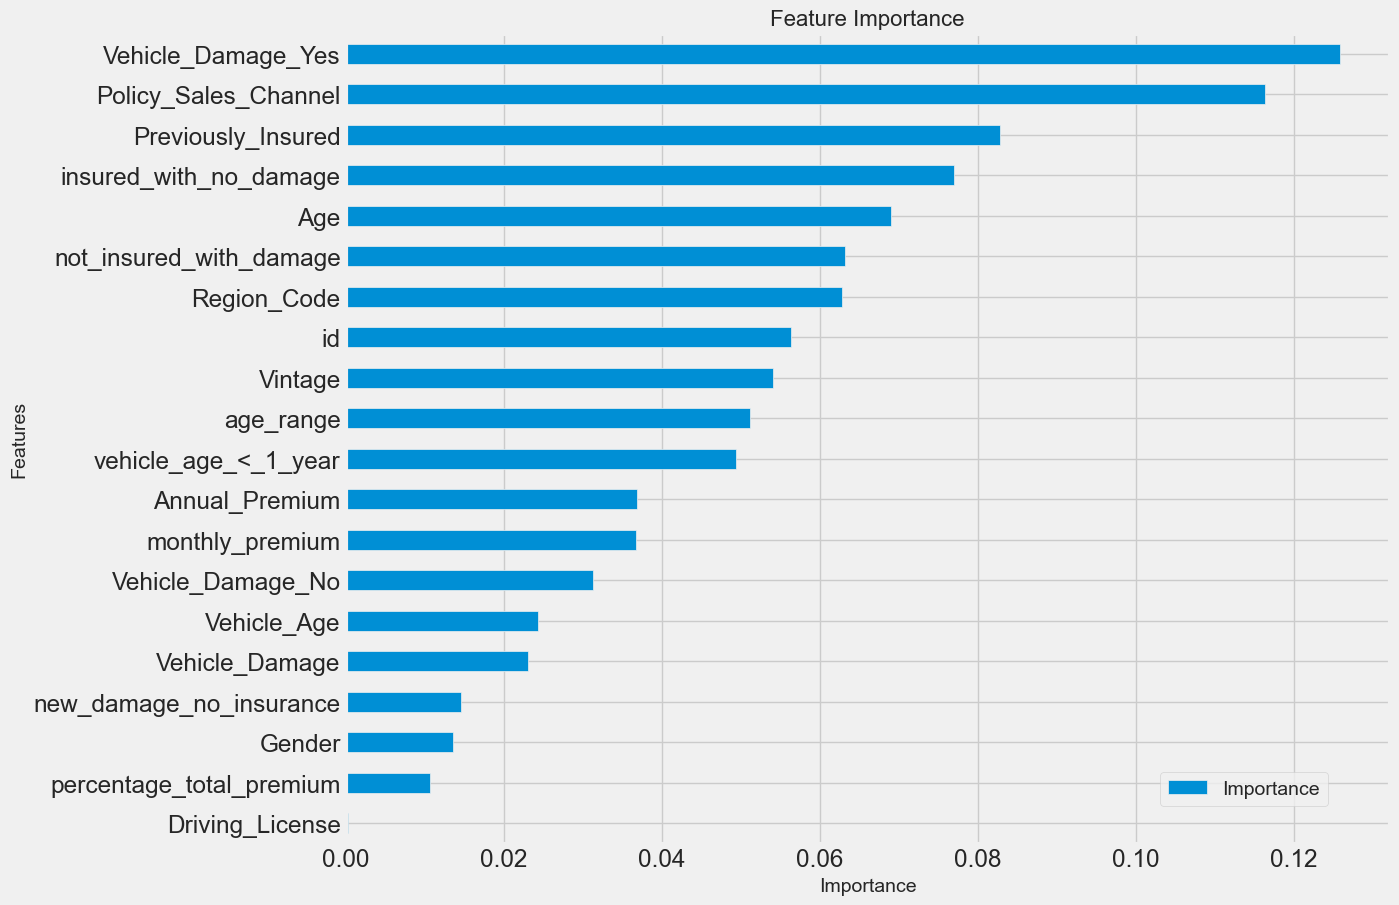

In [39]:
feature_importance.plot(kind='barh', figsize=(12,10))
plt.title('Feature Importance', fontsize=16)
plt.legend(bbox_to_anchor=(0.95, 0.1), fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xlabel('Importance', fontsize=14)
plt.show()

In [40]:
from sklearn.linear_model import Ridge

In [41]:
model = Ridge(alpha=1e-2).fit(x_train, y_train)

C:\Users\86131\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.75878e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [42]:
model.score(x_val, y_val)

0.5256554380984262

In [43]:
feature_names = x_train.columns

In [44]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, x_val, y_val, n_repeats=30,random_state=0)

permutation_importance_name = []
permutation_importance_mean = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feature_names[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
        f" +/- {r.importances_std[i]:.3f}")

        permutation_importance_name.append(feature_names[i])
        permutation_importance_mean.append(r.importances_mean[i]) 

Annual_Premium  6432298.117 +/- 15354.016
monthly_premium  6432153.503 +/- 15356.208
Previously_Insured  1.165 +/- 0.004
Vehicle_Damage_Yes  1.148 +/- 0.003
insured_with_no_damage  1.011 +/- 0.003
new_damage_no_insurance  0.099 +/- 0.001
not_insured_with_damage  0.062 +/- 0.001
age_range  0.060 +/- 0.001
vehicle_age_<_1_year  0.050 +/- 0.001
Gender    0.014 +/- 0.000
Age       0.010 +/- 0.000
Policy_Sales_Channel  0.004 +/- 0.000
Vehicle_Age  0.003 +/- 0.000
Driving_License  0.000 +/- 0.000


In [45]:
!pip install Boruta==0.3


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
x_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'age_range', 'monthly_premium',
       'percentage_total_premium', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes',
       'insured_with_no_damage', 'not_insured_with_damage',
       'vehicle_age_<_1_year', 'new_damage_no_insurance'],
      dtype='object')

In [47]:
x_train_selected = x_train[['id', 'Age', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage', 'age_range', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes', 'insured_with_no_damage', 'not_insured_with_damage']]

In [48]:
x_val_selected = x_val[['id', 'Age', 'Region_Code', 'Previously_Insured', 'Policy_Sales_Channel', 'Vintage', 'age_range', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes', 'insured_with_no_damage', 'not_insured_with_damage']]

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
dt = DecisionTreeClassifier()
dt.fit(x_train_selected, y_train)
y_pred_dt = dt.predict(x_val_selected)
acc_dt = accuracy_score(y_val, y_pred_dt)
f1_score_dt = f1_score(y_val, y_pred_dt)
recall_score_dt = recall_score(y_val, y_pred_dt)
precision_score_dt = precision_score(y_val, y_pred_dt)

In [52]:
print('The average accuracy is: {}'.format(acc_dt))

The average accuracy is: 0.8868759007681603


In [53]:
rf = RandomForestClassifier()
rf.fit(x_train_selected, y_train)
y_pred_rf = rf.predict(x_val_selected)
acc_rf = accuracy_score(y_val, y_pred_rf)
f1_score_rf = f1_score(y_val, y_pred_rf)
recall_score_rf = recall_score(y_val, y_pred_rf)
precision_score_rf = precision_score(y_val, y_pred_rf)

In [54]:
print('The average accuracy is: {}'.format(acc_rf))

The average accuracy is: 0.8960036847918142


In [55]:
import xgboost as xgb

In [56]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train_selected, y_train)
y_pred_xgb = xgb.predict(x_val_selected)
acc_xgb = accuracy_score(y_val, y_pred_xgb)
f1_score_xgb = f1_score(y_val, y_pred_xgb)
recall_score_xgb = recall_score(y_val, y_pred_xgb)
precision_score_xgb = precision_score(y_val, y_pred_xgb)

In [57]:
print('The average accuracy is: {}'.format(round(acc_xgb,3)))

The average accuracy is: 0.895


In [58]:
from lightgbm import LGBMClassifier

In [59]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_selected, y_train)
y_pred_lgbm = lgbm.predict(x_val_selected)
acc_lgbm = accuracy_score(y_val, y_pred_lgbm)
f1_score_lgbm = f1_score(y_val, y_pred_lgbm)
recall_score_lgbm = recall_score(y_val, y_pred_lgbm)
precision_score_lgbm = precision_score(y_val, y_pred_lgbm)

[LightGBM] [Info] Number of positive: 237272, number of negative: 233852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 471124, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503630 -> initscore=0.014519
[LightGBM] [Info] Start training from score 0.014519


In [60]:
print('The average accuracy is: {}'.format(round(acc_lgbm,3)))

The average accuracy is: 0.902


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier() 
knn.fit(x_train_selected, y_train)  
y_pred_knn = knn.predict(x_val_selected)  
acc_knn = accuracy_score(y_val, y_pred_knn)
f1_score_knn = f1_score(y_val, y_pred_knn)
recall_score_knn = recall_score(y_val, y_pred_knn)
precision_score_knn = precision_score(y_val, y_pred_knn)

In [63]:
print('The average accuracy is: {}'.format(round(acc_knn,3)))

The average accuracy is: 0.688


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log = LogisticRegression()
log.fit(x_train_selected, y_train)  
y_pred_log = log.predict(x_val_selected)  
acc_log = accuracy_score(y_val, y_pred_log)
f1_score_log = f1_score(y_val, y_pred_log)
recall_score_log = recall_score(y_val, y_pred_log)
precision_score_log = precision_score(y_val, y_pred_log)

C:\Users\86131\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
print('The average accuracy is: {}'.format(round(acc_log,3)))

The average accuracy is: 0.611


In [67]:
from sklearn.ensemble import BaggingClassifier

In [68]:
bag = BaggingClassifier()
bag.fit(x_train_selected, y_train)  
y_pred_bag = bag.predict(x_val_selected)  
acc_bag = accuracy_score(y_val, y_pred_bag)
f1_score_bag = f1_score(y_val, y_pred_bag)
recall_score_bag = recall_score(y_val, y_pred_bag)
precision_score_bag = precision_score(y_val, y_pred_bag)

In [69]:
print('The average accuracy is: {}'.format(round(acc_bag,3)))

The average accuracy is: 0.902


In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gbst = GradientBoostingClassifier()
gbst.fit(x_train_selected, y_train)  
y_pred_gbst = gbst.predict(x_val_selected)  
acc_gbst = accuracy_score(y_val, y_pred_gbst)
f1_score_gbst = f1_score(y_val, y_pred_gbst)
recall_score_gbst = recall_score(y_val, y_pred_gbst)
precision_score_gbst = precision_score(y_val, y_pred_gbst)

In [72]:
print('The average accuracy is: {}'.format(round(acc_gbst,3)))

The average accuracy is: 0.877


In [73]:
results = pd.DataFrame({
    'Model': ['Decision tree', 'Random Forest', 'XGBoost', 'LGBM', 'K Nearest Neighbor', 'Logistic Regression', 'Bagging Classifier', 'Gradient Boosting Classifier'],
    'Accuracy': [acc_dt, acc_rf, acc_xgb, acc_lgbm, acc_knn, acc_log, acc_bag, acc_gbst],
    'Recall': [recall_score_dt, recall_score_rf, recall_score_xgb, recall_score_lgbm, recall_score_knn, recall_score_log, recall_score_bag, recall_score_gbst],
    'Precision': [precision_score_dt, precision_score_rf, precision_score_xgb, precision_score_lgbm, precision_score_knn, precision_score_log, precision_score_bag, precision_score_gbst],    
    'F1-score': [f1_score_dt, f1_score_rf, f1_score_xgb, f1_score_lgbm, f1_score_knn, f1_score_log, f1_score_bag, f1_score_gbst]})
result = results.sort_values(by='F1-score', ascending=False)
result = result.set_index('Model')
display(result.head(10))

,Accuracy,Recall,Precision,F1-score
Model,,,,
LGBM,0.902403,0.889122,0.914121,0.901448
Bagging Classifier,0.902199,0.874344,0.926702,0.899762
Random Forest,0.896004,0.890168,0.901445,0.895771
XGBoost,0.895018,0.879582,0.908394,0.893756
Decision tree,0.886876,0.891983,0.883762,0.887853
Gradient Boosting Classifier,0.876990,0.927154,0.843377,0.883283
K Nearest Neighbor,0.688214,0.760674,0.665852,0.710112
Logistic Regression,0.611413,0.620092,0.611394,0.615712


In [82]:
param_grid = {"n_estimators": [200,300,400],
              "max_depth": [4,5,6],
             "learning_rate": [0.001, 0.01, 0.05]} 
xgb_grid_selected = GridSearchCV(xgb, cv=KFold(n_splits = 5, shuffle=True), param_grid=param_grid, scoring='accuracy')
eval_set = [(x_train_selected, y_train), (x_val_selected, y_val)]
xgb_grid_selected.fit(x_train_selected, y_train , eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
best_xgb_selected = xgb_grid_selected.best_estimator_


ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\86131\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\86131\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
TypeError: XGBClassifier.fit() got an unexpected keyword argument 'eval_metric'


In [ ]:
# retrieve performance metrics
results = xgb_grid_selected.best_estimator_.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# plot classification error
fig,ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

In [80]:
y_pred_xgb_best_model = best_xgb_selected.predict(x_val_selected)

NameError: name 'best_xgb_selected' is not defined

In [ ]:
print(classification_report(y_val, y_pred_xgb_best_model))

In [ ]:
plot_confusion_matrix(best_xgb_selected, x_val_selected, y_val) 
plt.title('Confusion matrix')
plt.yticks(ticks=[0,1], labels=['No accepted','Accepted'])
plt.xticks(ticks=[0,1], labels=['No accepted','Accepted'])
plt.grid(False)
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
ns_probs = [0 for _ in range(len(y_val))]

# fit a model
SEED=1

dt_clf = DecisionTreeClassifier(random_state=SEED)
rf_clf = RandomForestClassifier(random_state=SEED)
xgb_clf = XGBClassifier(random_state=SEED)
lgbm_clf = LGBMClassifier(random_state=SEED)
knn_clf = KNeighborsClassifier() 
log_clf = LogisticRegression(random_state=SEED)
bag_clf = BaggingClassifier(random_state=SEED)
gbst_clf = GradientBoostingClassifier(random_state=SEED)


# trains the classifiers
dt_clf.fit(x_train_selected, y_train)
rf_clf.fit(x_train_selected, y_train)
xgb_clf.fit(x_train_selected, y_train)
lgbm_clf.fit(x_train_selected, y_train)
knn_clf.fit(x_train_selected, y_train)
log_clf.fit(x_train_selected, y_train)
bag_clf.fit(x_train_selected, y_train)
gbst_clf.fit(x_train_selected, y_train)


# predict probabilities

dt_probs = dt_clf.predict_proba(x_val_selected)
rf_probs = rf_clf.predict_proba(x_val_selected)
xgb_probs = xgb_clf.predict_proba(x_val_selected)
lgbm_probs = lgbm_clf.predict_proba(x_val_selected)
knn_probs = knn_clf.predict_proba(x_val_selected)
log_probs = log_clf.predict_proba(x_val_selected)
bag_probs = bag_clf.predict_proba(x_val_selected)
gbst_probs = gbst_clf.predict_proba(x_val_selected)

# keep probabilities for the positive outcome only

dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
lgbm_probs = lgbm_probs[:, 1]
knn_probs = knn_probs[:, 1]
log_probs = log_probs[:, 1]
bag_probs =  bag_probs[:, 1]
gbst_probs =  gbst_probs[:, 1]

# calculate scores

ns_auc = roc_auc_score(y_val, ns_probs)
dt_auc = roc_auc_score(y_val, dt_probs)
rf_auc = roc_auc_score(y_val, rf_probs)
xgb_auc = roc_auc_score(y_val, xgb_probs)
lgbm_auc = roc_auc_score(y_val, lgbm_probs)
knn_auc = roc_auc_score(y_val, knn_probs)
log_auc = roc_auc_score(y_val, log_probs)
bag_auc = roc_auc_score(y_val, bag_probs)
gbst_auc = roc_auc_score(y_val, gbst_probs)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
print('LGBM: ROC AUC=%.3f' % (lgbm_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Logistic Regression: ROC AUC=%.3f' % (log_auc))
print('Bagging Classifier: ROC AUC=%.3f' % (bag_auc))
print('Gradient Boosting Classifier: ROC AUC=%.3f' % (gbst_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_val, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_val, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_val, xgb_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_val, lgbm_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_val, knn_probs)
log_fpr, log_tpr, _ = roc_curve(y_val, log_probs)
bag_fpr, bag_tpr, _ = roc_curve(y_val, bag_probs)
gbst_fpr, gbst_tpr, _ = roc_curve(y_val, gbst_probs)



# plot the roc curve for the model
plt.figure(figsize=(16,8), dpi=100)

plt.plot(ns_fpr, ns_tpr, linestyle='dashed', linewidth=2, color= 'black', label='No Skill (auc = %0.3f)' % ns_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', linewidth=2, color= 'red', label='Decision Tree (auc = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='-', linewidth=2, color= 'blue', label='Random Forest (auc = %0.3f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', linewidth=2, color= 'green', label='XGBoost (auc = %0.3f)' % xgb_auc)
plt.plot(lgbm_fpr, lgbm_tpr, linestyle='-', linewidth=2, color= 'yellow', label='LGBM (auc = %0.3f)' % lgbm_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='-', linewidth=2, color= 'orange', label='KNN (auc = %0.3f)' % knn_auc)
plt.plot(log_fpr, log_tpr, linestyle='-', linewidth=2, color= 'magenta', label='Logistic Regression (auc = %0.3f)' % log_auc)
plt.plot(bag_fpr, bag_tpr, linestyle='-', linewidth=2, color= 'gray', label='Bagging Classifier (auc = %0.3f)' % bag_auc)
plt.plot(gbst_fpr, gbst_tpr, linestyle='-', linewidth=2, color= 'pink', label='Gradient Boosting Classifier (auc = %0.3f)' % gbst_auc)


# axis labels
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("AUC-ROC Curve")
plt.legend()

plt.show()

In [ ]:
import scikitplot as skplt

In [ ]:
xgb_probs2 = best_xgb_selected.predict_proba(x_val_selected)

skplt.metrics.plot_roc(y_val, xgb_probs2, figsize=(12,8))
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.05)
plt.show()

In [ ]:
SEED=1

dt_clf = DecisionTreeClassifier(random_state=SEED)
rf_clf = RandomForestClassifier(random_state=SEED)
xgb_clf = XGBClassifier(random_state=SEED)
lgbm_clf = LGBMClassifier(random_state=SEED)
knn_clf = KNeighborsClassifier() 
log_clf = LogisticRegression(random_state=SEED)
bag_clf = BaggingClassifier(random_state=SEED)
gbst_clf = GradientBoostingClassifier(random_state=SEED)


# trains the classifiers
dt_clf.fit(x_train_selected, y_train)
rf_clf.fit(x_train_selected, y_train)
xgb_clf.fit(x_train_selected, y_train)
lgbm_clf.fit(x_train_selected, y_train)
knn_clf.fit(x_train_selected, y_train)
log_clf.fit(x_train_selected, y_train)
bag_clf.fit(x_train_selected, y_train)
gbst_clf.fit(x_train_selected, y_train)


# predict probabilities

dt_probs = dt_clf.predict_proba(x_val_selected)
rf_probs = rf_clf.predict_proba(x_val_selected)
xgb_probs = xgb_clf.predict_proba(x_val_selected)
lgbm_probs = lgbm_clf.predict_proba(x_val_selected)
knn_probs = knn_clf.predict_proba(x_val_selected)
log_probs = log_clf.predict_proba(x_val_selected)
bag_probs = bag_clf.predict_proba(x_val_selected)
gbst_probs = gbst_clf.predict_proba(x_val_selected)


probas_list = [dt_probs, rf_probs, xgb_probs, lgbm_probs, knn_probs, log_probs, bag_probs, gbst_probs]

clf_names = ['Decision tree', 'Random Forest', 'XGBoost', 'LGBM', 'K Nearest Neighbor', 'Logistic Regression', 'Bagging Classifier', 'Gradient Boosting Classifier']

skplt.metrics.plot_calibration_curve(y_val, probas_list, clf_names, figsize=(16,12))
plt.show()